# **Tech Challenge - Fase 3**

## Marcelo Hissao Ekami - RM 358953


Este trabalho tem como objetivo a construção de um dashboard que permite estimar a nota de corte do SISU (Sistema de Seleção Unificada) a partir de dados históricos e um modelo de machine learning.

### Fonte de dados

Os dados foram obtidos do Portal de Dados Abertos do Ministério da Educação.
https://dadosabertos.mec.gov.br/sisu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL do arquivo CSV
url = 'https://dadosabertos.mec.gov.br/images/conteudo/sisu/2023/chamada_regular_sisu_2023_2.csv'
# caso a leitura do arquivo apresente problemas (Timeout, intermitência na tranferência, etc)
# fazer o dowload do arquivo .csv e arrastar para a aba Arquivos e descomentar a linha abaixo
url = 'chamada_regular_sisu_2023_2.csv'
df = pd.read_csv(url, sep='|', encoding='latin1', header=0, on_bad_lines='skip')
df.head()

<ipython-input-6-fe4935178689>:9: DtypeWarning: Columns (17,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep='|', encoding='latin1', header=0, on_bad_lines='skip')


,ANO,EDICAO,ETAPA,DS_ETAPA,CODIGO_IES,NOME_IES,SIGLA_IES,UF_IES,CODIGO_CAMPUS,NOME_CAMPUS,...,NOTA_L_COM_PESO,NOTA_CH_COM_PESO,NOTA_CN_COM_PESO,NOTA_M_COM_PESO,NOTA_R_COM_PESO,NOTA_CANDIDATO,NOTA_CORTE,CLASSIFICACAO,APROVADO,MATRICULA
0,2023,2,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"601,3","605,3","1230,6","2652,8",2760,"713,64","709,82",10.0,S,EFETIVADA
1,2023,2,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"620,3","630,2","1106,4","2926,4",1980,"660,3","709,82",51.0,N,PENDENTE
2,2023,2,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"631,3","604,8","1242,2","2692,4",1740,"628,25","709,82",68.0,N,PENDENTE
3,2023,2,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"534,8","550,8",937,2448,2460,"630,05","709,82",67.0,N,PENDENTE
4,2023,2,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"623,8","625,3","1275,8","2702,8",2760,"726,15","709,82",1.0,S,EFETIVADA


### Análise dos dados

In [ ]:
df.shape

(578781, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578781 entries, 0 to 578780
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO                    578781 non-null  int64  
 1   EDICAO                 578781 non-null  int64  
 2   ETAPA                  578781 non-null  int64  
 3   DS_ETAPA               578781 non-null  object 
 4   CODIGO_IES             578781 non-null  int64  
 5   NOME_IES               578781 non-null  object 
 6   SIGLA_IES              578781 non-null  object 
 7   UF_IES                 578781 non-null  object 
 8   CODIGO_CAMPUS          578781 non-null  int64  
 9   NOME_CAMPUS            578781 non-null  object 
 10  UF_CAMPUS              578781 non-null  object 
 11  MUNICIPIO_CAMPUS       578781 non-null  object 
 12  CODIGO_CURSO           578781 non-null  int64  
 13  NOME_CURSO             578781 non-null  object 
 14  GRAU                   578781 non-nu

In [ ]:
# Agrupa por curso e tira média da nota de corte

print(df.columns)
df['NOTA_CORTE'] = df['NOTA_CORTE'].astype(str).str.replace(',', '.', regex=False)
df['NOTA_CORTE'] = pd.to_numeric(df['NOTA_CORTE'].str.replace(',', '.'), errors='coerce')

medias = df.groupby("NOME_CURSO")["NOTA_CORTE"].mean().sort_values(ascending=False)

medias.head(10)

Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DT_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA'],
      dtype='object')


,NOTA_CORTE
NOME_CURSO,
MEDICINA,779.582345
ENGENHARIA DE MECATRÔNICA,756.644236
ENGENHARIA DA COMPUTAÇÃO,741.225804
ENGENHARIA DE COMPUTAÇÃO,739.015715
ODONTOLOGIA,732.075646
ENGENHARIA ELETRÔNICA E DE COMPUTAÇÃO,727.001466
CINEMA E AUDIOVISUAL,724.200783
CIÊNCIAS BIOLÓGICAS: MODALIDADE MÉDICA,724.043996
RELAÇÕES INTERNACIONAIS,718.409633


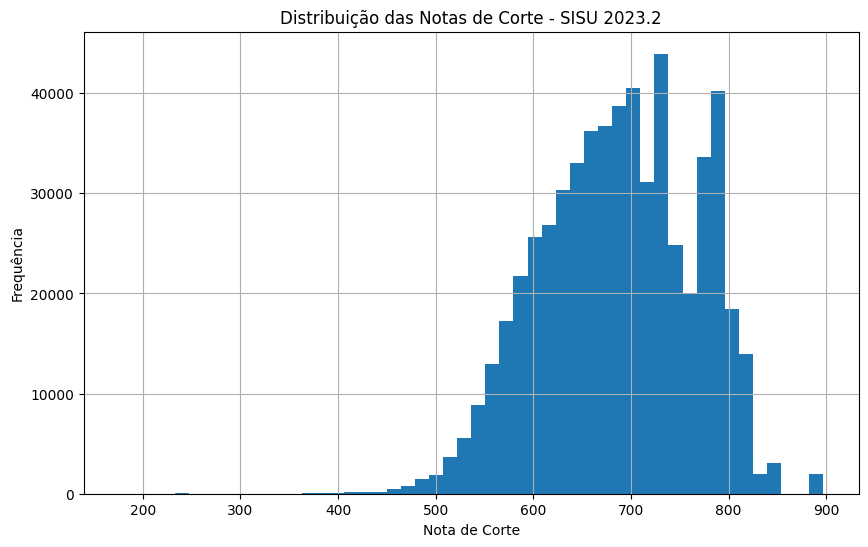

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df["NOTA_CORTE"].hist(bins=50)
plt.title("Distribuição das Notas de Corte - SISU 2023.2")
plt.xlabel("Nota de Corte")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

In [ ]:
df['NOTA_CORTE'].describe()

,NOTA_CORTE
count,576550.000000
mean,687.451885
std,78.443945
min,175.440000
25%,630.110000
50%,689.940000
75%,745.250000
max,897.190000


### Construção do modelo de Machine Learning

A variável target é a note de corte (NOTA_CORTE). Para o modelo, vamos considerar a primeira opção dos candidatos e utilizar as variáveis: "NOME_CURSO", "SIGLA_IES", "UF_CAMPUS", "GRAU", "TURNO", "MOD_CONCORRENCIA", "QT_VAGAS_CONCORRENCIA", "NOTA_CORTE"

In [ ]:
df["QT_VAGAS_CONCORRENCIA"] = pd.to_numeric(df["QT_VAGAS_CONCORRENCIA"], errors="coerce")

# Foco apenas em candidatos da 1ª opção e com nota de corte válida
df = df[(df["OPCAO"] == 1) & (df["NOTA_CORTE"].notnull())]

# Selecionar colunas relevantes para o modelo
dados_ml = df[[
    "NOME_CURSO", "SIGLA_IES", "UF_CAMPUS", "GRAU", "TURNO",
    "MOD_CONCORRENCIA", "QT_VAGAS_CONCORRENCIA", "NOTA_CORTE"
]].copy()

In [ ]:
# Variáveis categóricas em dummies
dados_ml_dummies = pd.get_dummies(dados_ml.drop("NOTA_CORTE", axis=1))

# Variável alvo
y = dados_ml["NOTA_CORTE"]

# Dataset final de treino
X = dados_ml_dummies

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

O modelo preditivo escolhido foi o XGBoostRegressor, que é voltado para tarefas de regressão. O XGBoost é amplamente utilizado por sua alta performance e capacidade de lidar bem com dados estruturados e tabulares.

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

modelo = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo.fit(X_train, y_train)


pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 16.46
RMSE: 24.82


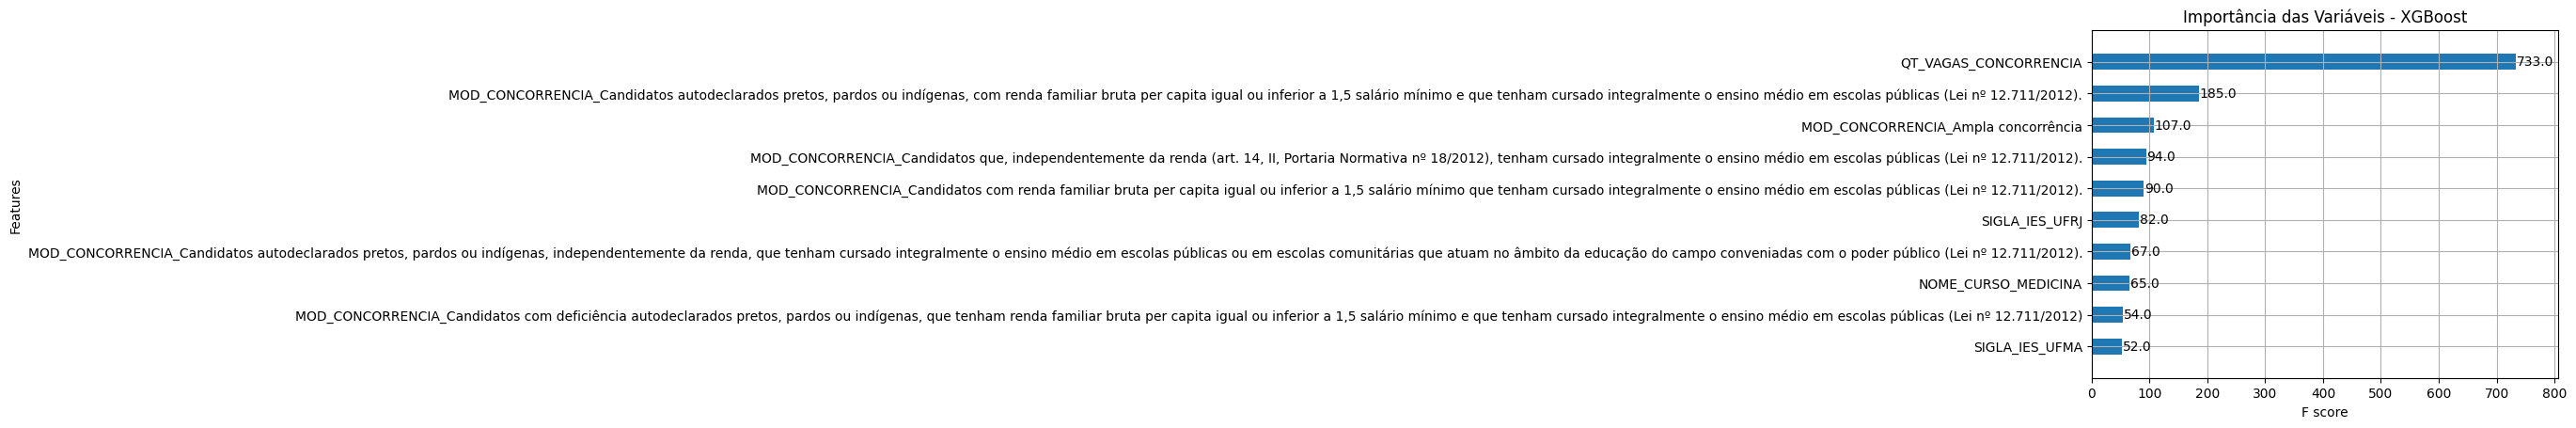

In [ ]:

plot_importance(modelo, max_num_features=10, height=0.5)
plt.title("Importância das Variáveis - XGBoost")
plt.show()

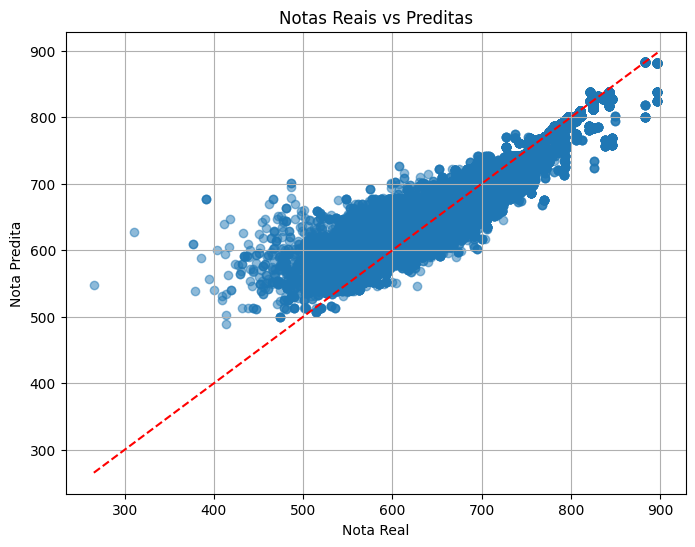

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nota Real")
plt.ylabel("Nota Predita")
plt.title("Notas Reais vs Preditas")
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(modelo, "modelo_xgboost_sisu.joblib")
joblib.dump(X.columns.tolist(), "features_xgboost_sisu.pkl")
print("Modelo salvo como 'modelo_xgboost_sisu.joblib' com sucesso!")

Modelo salvo como 'modelo_xgboost_sisu.joblib' com sucesso!


### API
Foi construída uma API com o framework FastAPI para utilizar o modelo.
O endpoint /prever: recebe dados via JSON e retorna a nota de corte prevista

### Dashboard
O Dashboard foi construído utilizando o framework Streamlit.
Permite selecionar os parâmetros (curso, UF, turno, vagas, etc) e faz a chamada para a API.

### Execução local
Instalar dependências:
pip install -r requirements.txt
Iniciar a API:
python3 -m uvicorn api:app --host 0.0.0.0 --port 8000
Em outro terminal, iniciar o dashboard:
streamlit run dashboard.py
Acessar:
API: http://localhost:8000/docs
Dashboard: http://localhost:8501

### Deploy
Foi realizado o deploy da API e do Dashboard em uma instância EC2 na AWS.
Link para dashboard hospedado na AWS: http://54.208.50.208:8501/